### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Training data

In [2]:
data = pd.read_csv('train.csv')

Removing duplicates to avoid overfitting

In [3]:
data.drop_duplicates(inplace=True)

In [4]:
data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
5,UVT2FMEWUR,33,44855,39393,416,80,4,16.25,12,0.76,Bachelor's,Unemployed,Single,No,No,Other,Yes,0
6,023MJWH6AS,22,20216,153128,692,90,4,22.91,60,0.32,High School,Self-employed,Married,No,Yes,Auto,No,0
7,W2J1SLV57M,57,90343,71189,345,102,4,12.98,12,0.71,Bachelor's,Unemployed,Married,No,Yes,Other,Yes,0
8,QGIXFHVHO1,49,35880,96919,353,33,2,10.97,24,0.31,PhD,Self-employed,Divorced,Yes,No,Other,Yes,1
9,QRZHVC1HRR,19,71995,23105,587,105,2,2.06,12,0.38,High School,Unemployed,Divorced,No,Yes,Other,Yes,0


### EDA

In [5]:
# Remove the 'LoanID' column
data.drop('LoanID', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             204277 non-null  int64  
 1   Income          204277 non-null  int64  
 2   LoanAmount      204277 non-null  int64  
 3   CreditScore     204277 non-null  int64  
 4   MonthsEmployed  204277 non-null  int64  
 5   NumCreditLines  204277 non-null  int64  
 6   InterestRate    204277 non-null  float64
 7   LoanTerm        204277 non-null  int64  
 8   DTIRatio        204277 non-null  float64
 9   Education       204277 non-null  object 
 10  EmploymentType  204277 non-null  object 
 11  MaritalStatus   204277 non-null  object 
 12  HasMortgage     204277 non-null  object 
 13  HasDependents   204277 non-null  object 
 14  LoanPurpose     204277 non-null  object 
 15  HasCoSigner     204277 non-null  object 
 16  Default         204277 non-null  int64  
dtypes: float64

In [7]:
#one-hot encoding for all the categorical columns
data = pd.get_dummies(data, drop_first=True)

In [8]:
data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,18,137576,209136,846,26,2,10.47,60,0.81,0,...,False,False,True,True,False,True,False,False,False,False
1,47,57194,5970,748,30,2,19.72,36,0.73,0,...,True,False,False,False,True,False,True,False,False,False
2,26,84328,95065,453,7,2,24.25,12,0.45,0,...,False,True,False,False,False,False,False,False,True,True
3,53,49795,229582,533,107,3,14.44,60,0.17,1,...,False,False,True,True,False,False,False,False,False,True
4,49,115450,22072,840,0,4,24.48,12,0.11,0,...,False,False,True,False,True,False,True,False,False,True
5,33,44855,39393,416,80,4,16.25,12,0.76,0,...,True,False,True,False,False,False,False,False,True,True
6,22,20216,153128,692,90,4,22.91,60,0.32,0,...,False,True,False,False,True,False,False,False,False,False
7,57,90343,71189,345,102,4,12.98,12,0.71,0,...,True,True,False,False,True,False,False,False,True,True
8,49,35880,96919,353,33,2,10.97,24,0.31,1,...,False,False,False,True,False,False,False,False,True,True
9,19,71995,23105,587,105,2,2.06,12,0.38,0,...,True,False,False,False,True,False,False,False,True,True


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           204277 non-null  int64  
 1   Income                        204277 non-null  int64  
 2   LoanAmount                    204277 non-null  int64  
 3   CreditScore                   204277 non-null  int64  
 4   MonthsEmployed                204277 non-null  int64  
 5   NumCreditLines                204277 non-null  int64  
 6   InterestRate                  204277 non-null  float64
 7   LoanTerm                      204277 non-null  int64  
 8   DTIRatio                      204277 non-null  float64
 9   Default                       204277 non-null  int64  
 10  Education_High School         204277 non-null  bool   
 11  Education_Master's            204277 non-null  bool   
 12  Education_PhD                 204277 non-nul

In [10]:
#converts bool to int
def func(x,col):
    if x[col] == True:
        return 1
    else:
        return 0

In [11]:
#Apply func to all those columnns which have boolean values
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data.apply(lambda x: func(x,col), axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           204277 non-null  int64  
 1   Income                        204277 non-null  int64  
 2   LoanAmount                    204277 non-null  int64  
 3   CreditScore                   204277 non-null  int64  
 4   MonthsEmployed                204277 non-null  int64  
 5   NumCreditLines                204277 non-null  int64  
 6   InterestRate                  204277 non-null  float64
 7   LoanTerm                      204277 non-null  int64  
 8   DTIRatio                      204277 non-null  float64
 9   Default                       204277 non-null  int64  
 10  Education_High School         204277 non-null  int64  
 11  Education_Master's            204277 non-null  int64  
 12  Education_PhD                 204277 non-nul

In [13]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,...,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.489340,82506.227980,127547.496395,574.075500,59.508511,2.502078,13.488147,36.010926,0.500579,0.116278,...,0.249632,0.333944,0.332504,0.500032,0.500203,0.200630,0.199998,0.200111,0.199871,0.500281
std,14.995191,38952.103374,70855.064746,158.877098,34.645589,1.116898,6.636060,16.944827,0.230914,0.320559,...,0.432801,0.471621,0.471112,0.500001,0.500001,0.400472,0.400000,0.400084,0.399904,0.500001
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48878.000000,66059.000000,437.000000,30.000000,2.000000,7.760000,24.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82400.000000,127603.000000,574.000000,59.000000,3.000000,13.450000,36.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,116247.000000,188843.000000,712.000000,90.000000,4.000000,19.240000,48.000000,0.700000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


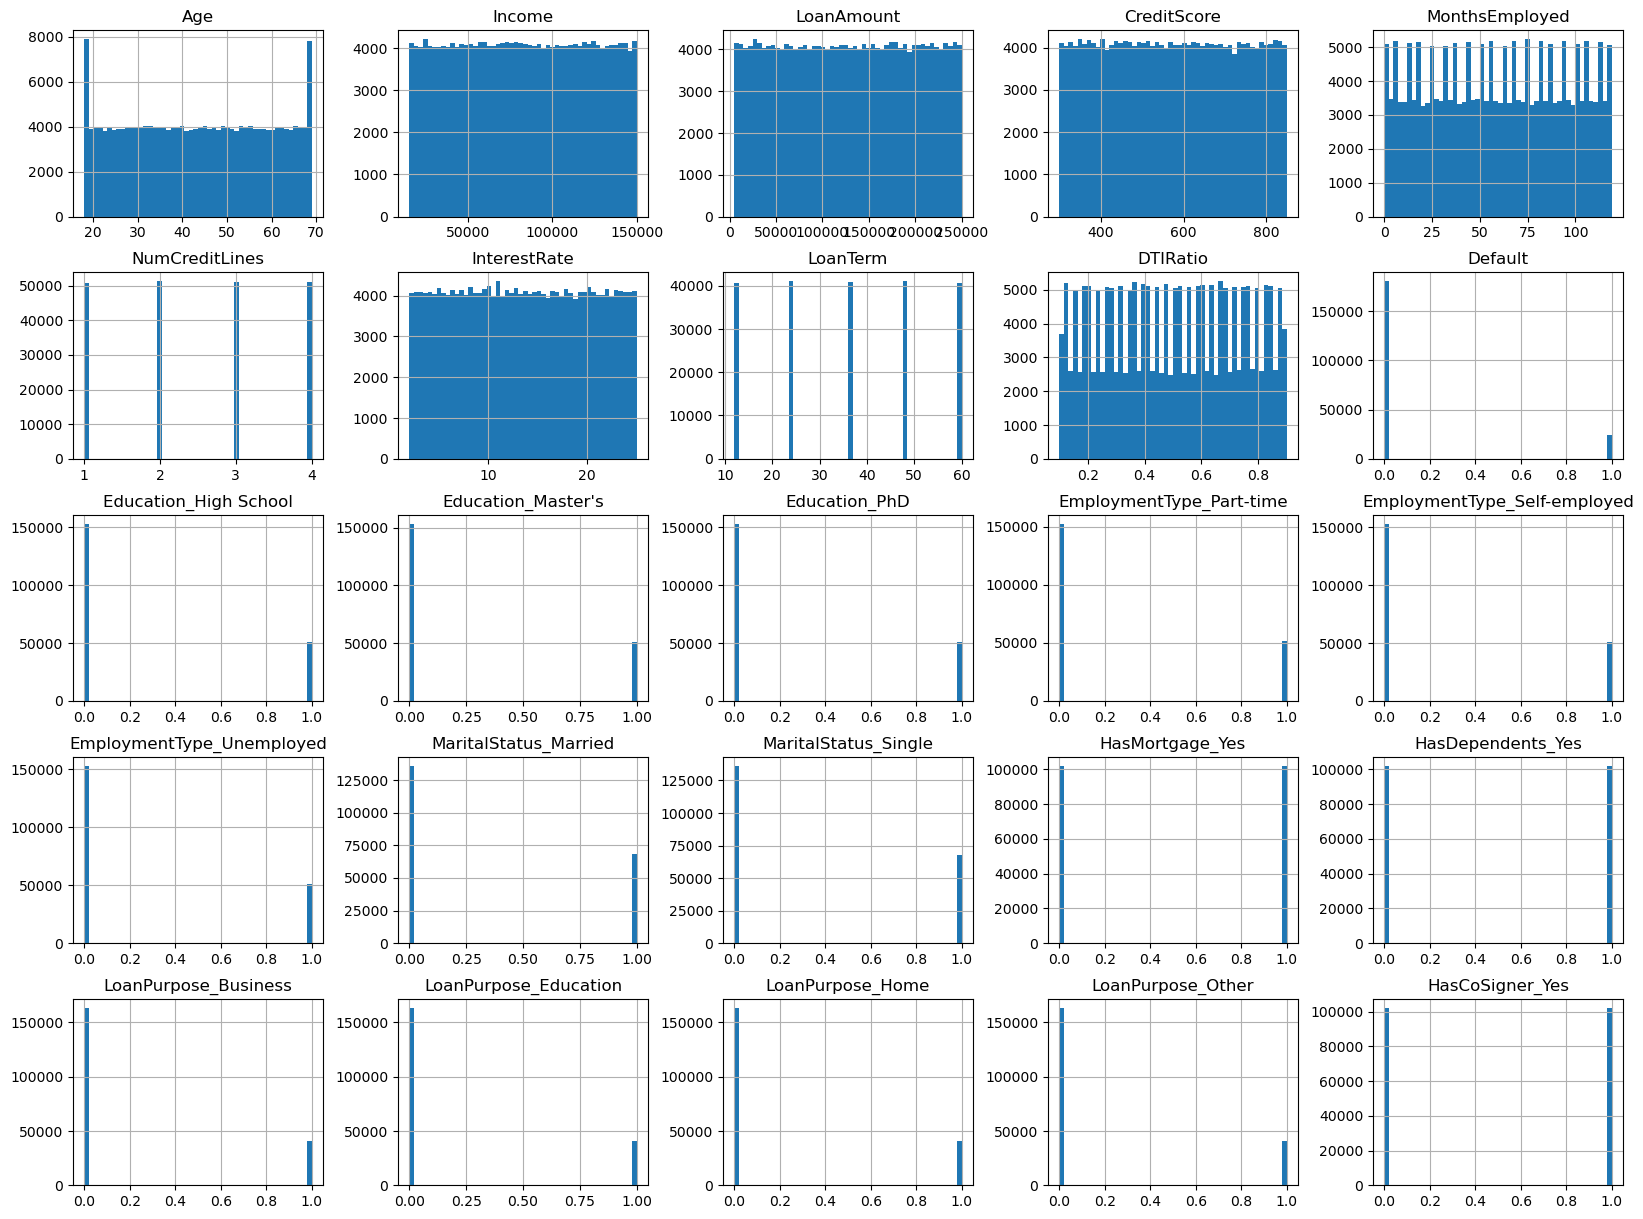

In [14]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:

corr_matrix = data.corr()

# Sort the correlation values for the 'Default' column
sorted_corr = corr_matrix['Default'].sort_values(ascending=False)
print(sorted_corr)

Default                         1.000000
InterestRate                    0.129885
LoanAmount                      0.085519
EmploymentType_Unemployed       0.036079
NumCreditLines                  0.028565
Education_High School           0.021321
DTIRatio                        0.018595
LoanPurpose_Business            0.011762
EmploymentType_Part-time        0.005815
MaritalStatus_Single            0.005641
LoanPurpose_Education           0.005515
LoanPurpose_Other               0.001316
LoanTerm                        0.000815
EmploymentType_Self-employed   -0.001970
Education_Master's             -0.013153
Education_PhD                  -0.016898
HasMortgage_Yes                -0.021174
LoanPurpose_Home               -0.022071
MaritalStatus_Married          -0.025877
CreditScore                    -0.034128
HasDependents_Yes              -0.034737
HasCoSigner_Yes                -0.040688
MonthsEmployed                 -0.095429
Income                         -0.100515
Age             

We tried dropping the columns with high correlation but it didn't improve the score. So we kept all the columns.

In [16]:
# #drop columns with low correlation
# data.drop(['LoanPurpose_Business','EmploymentType_Part-time','MaritalStatus_Single','LoanPurpose_Education','LoanTerm','LoanPurpose_Other'], axis=1, inplace=True)


Checking for null values to avoid errors
(There weren't any null values)

In [17]:
data.isnull().sum()

Age                             0
Income                          0
LoanAmount                      0
CreditScore                     0
MonthsEmployed                  0
NumCreditLines                  0
InterestRate                    0
LoanTerm                        0
DTIRatio                        0
Default                         0
Education_High School           0
Education_Master's              0
Education_PhD                   0
EmploymentType_Part-time        0
EmploymentType_Self-employed    0
EmploymentType_Unemployed       0
MaritalStatus_Married           0
MaritalStatus_Single            0
HasMortgage_Yes                 0
HasDependents_Yes               0
LoanPurpose_Business            0
LoanPurpose_Education           0
LoanPurpose_Home                0
LoanPurpose_Other               0
HasCoSigner_Yes                 0
dtype: int64

Checking for outliers because they can affect the model's performance. No outliers were found.

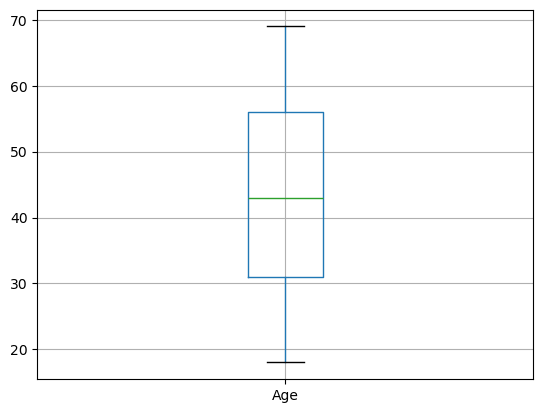

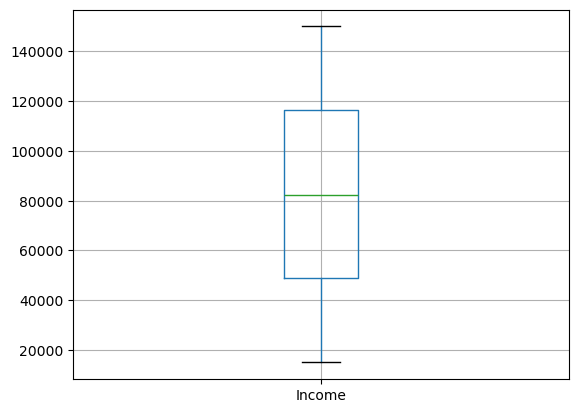

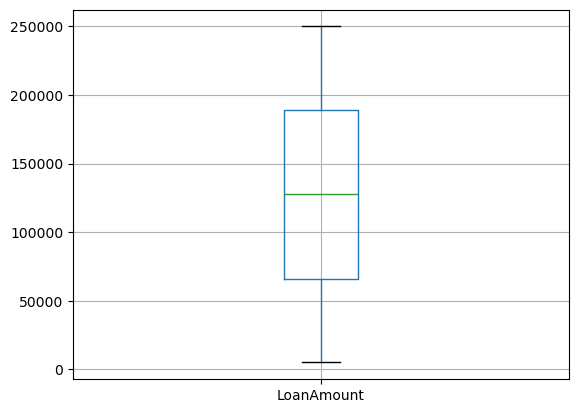

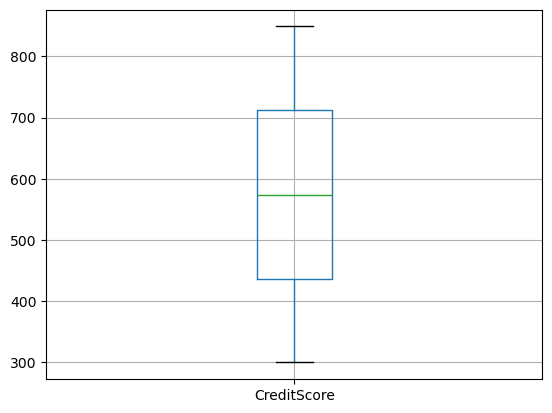

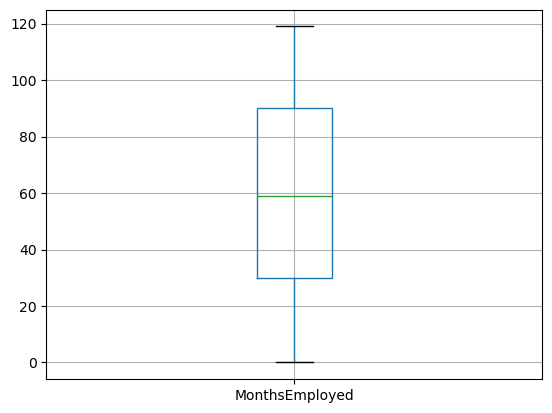

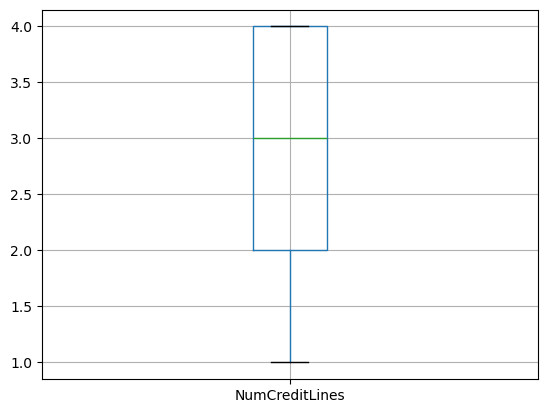

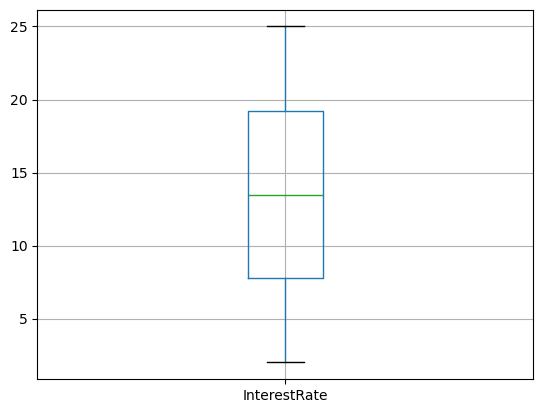

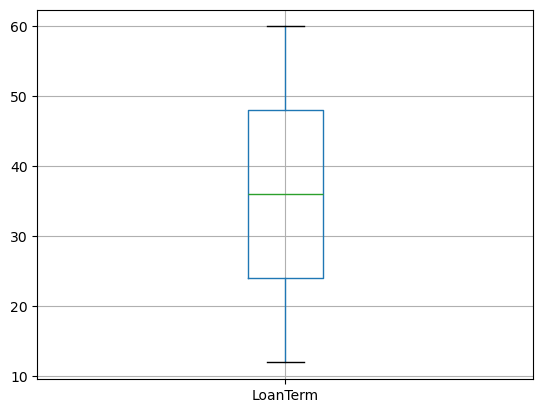

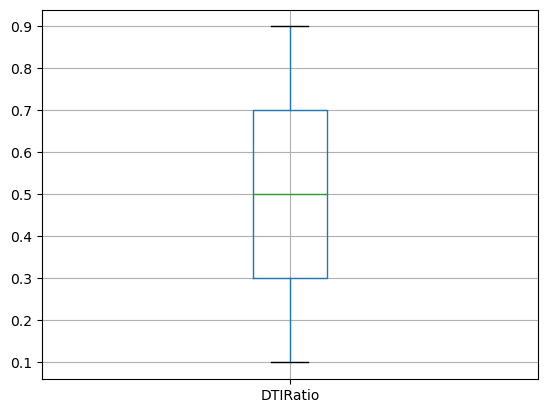

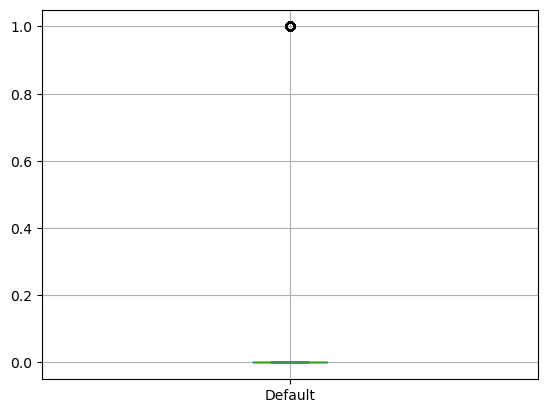

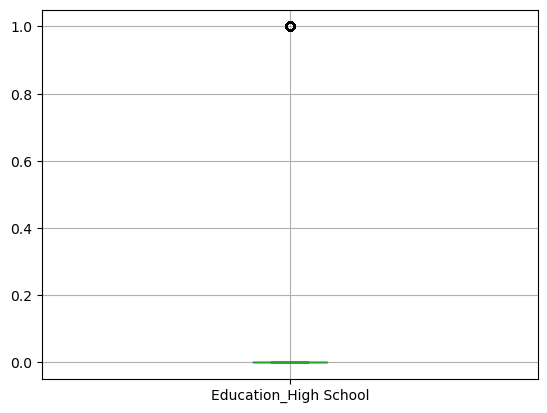

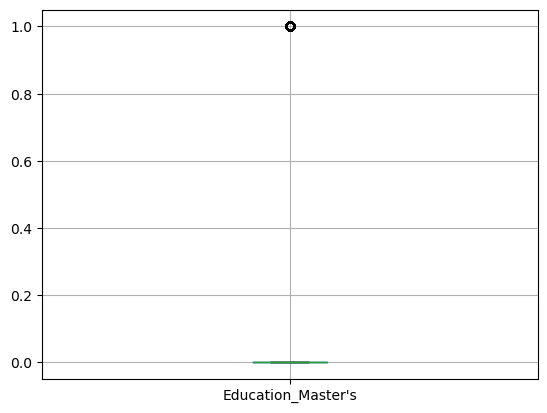

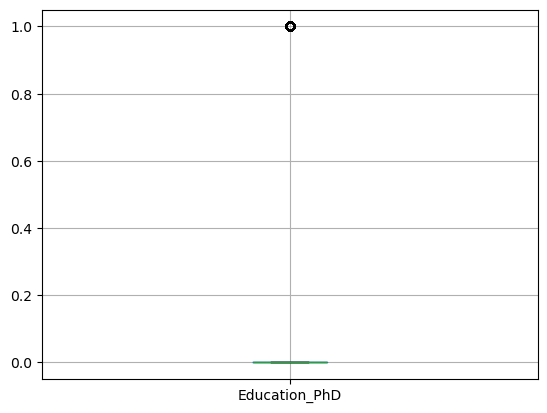

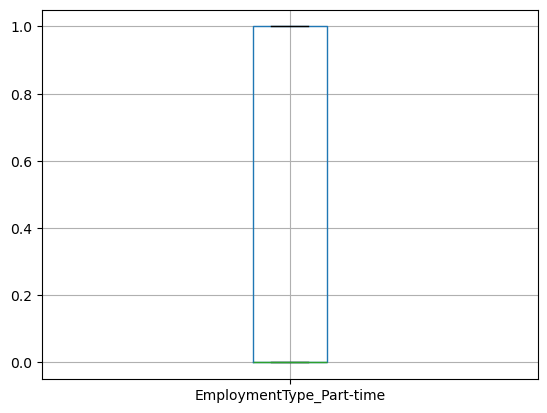

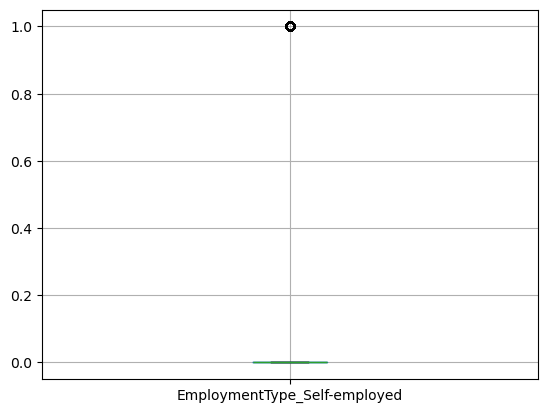

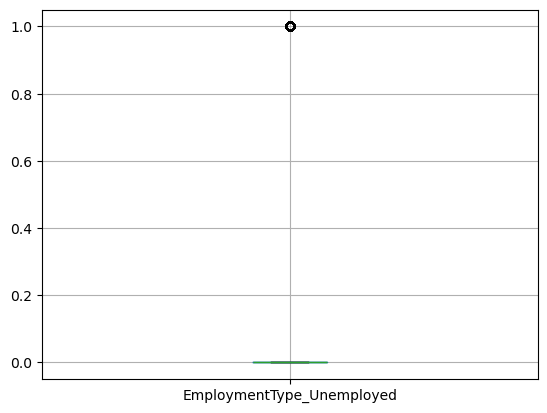

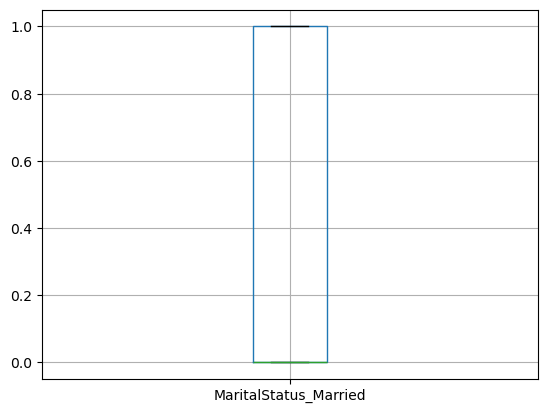

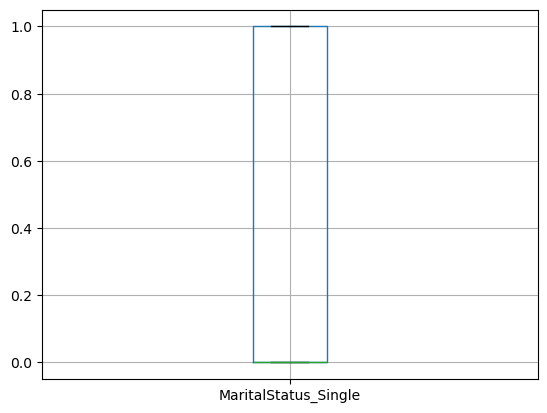

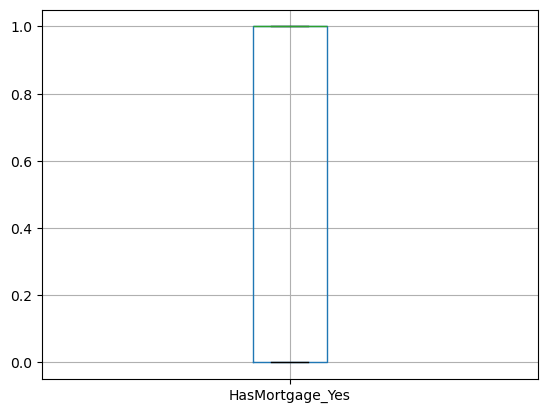

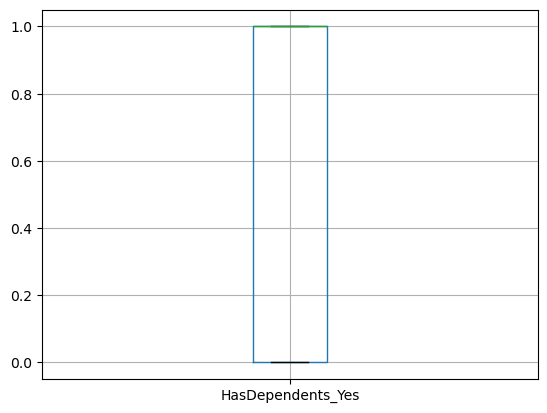

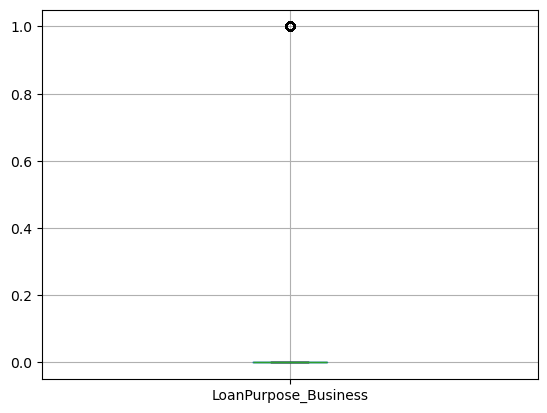

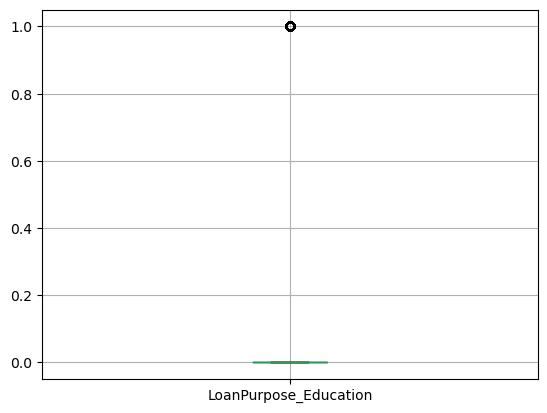

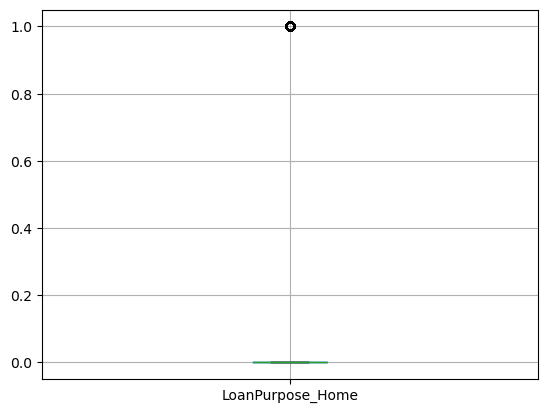

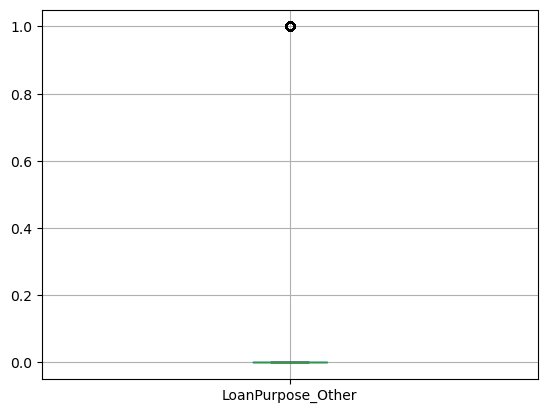

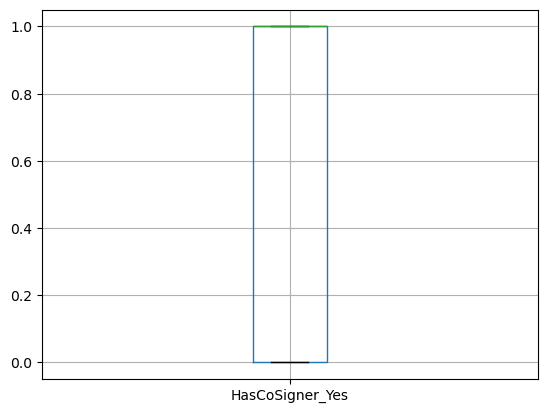

In [18]:
#box plot for all the columns
for col in data.columns:
    data.boxplot(column=col)
    plt.show()

In [19]:
data['Default'].value_counts()

Default
0    180524
1     23753
Name: count, dtype: int64

In [20]:
print(23753/(23753+180524))

0.1162783867004117


In [21]:
print(180524/(23753+180524))

0.8837216132995883


We tried to undersamle the data using clustered centroids method because the labels were skewed but that resulted in a bad score so we decided to keep the data as it is.

In [22]:
# #unddrsample the data using cluster centroids
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids(random_state=0)
# X_resampled, y_resampled = cc.fit_resample(data.drop('Default', axis=1), data['Default'])

In [23]:
# X_resampled = pd.DataFrame(X_resampled, columns=data.drop('Default', axis=1).columns)
# y_resampled = pd.DataFrame(y_resampled, columns=['Default'])

# data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

### Splitting Train and Test Data

In [24]:
# data = data.reset_index(drop=True)

# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=521)
# for train_index, test_index in split.split(data, data["Default"]):
#  strat_train_set = data.loc[train_index]
#  strat_test_set = data.loc[test_index]

In [25]:
# Split the data into X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
split=train_test_split(data, test_size=0.01, random_state=42)
strat_train_set=split[0]
strat_test_set=split[1]


In [26]:
strat_test_set["Default"].value_counts() / len(strat_test_set)

Default
0    0.888889
1    0.111111
Name: count, dtype: float64

In [27]:
strat_train_set["Default"].value_counts() / len(strat_train_set)

Default
0    0.883669
1    0.116331
Name: count, dtype: float64

In [28]:
data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,18,137576,209136,846,26,2,10.47,60,0.81,0,...,0,0,1,1,0,1,0,0,0,0
1,47,57194,5970,748,30,2,19.72,36,0.73,0,...,1,0,0,0,1,0,1,0,0,0
2,26,84328,95065,453,7,2,24.25,12,0.45,0,...,0,1,0,0,0,0,0,0,1,1
3,53,49795,229582,533,107,3,14.44,60,0.17,1,...,0,0,1,1,0,0,0,0,0,1
4,49,115450,22072,840,0,4,24.48,12,0.11,0,...,0,0,1,0,1,0,1,0,0,1
5,33,44855,39393,416,80,4,16.25,12,0.76,0,...,1,0,1,0,0,0,0,0,1,1
6,22,20216,153128,692,90,4,22.91,60,0.32,0,...,0,1,0,0,1,0,0,0,0,0
7,57,90343,71189,345,102,4,12.98,12,0.71,0,...,1,1,0,0,1,0,0,0,1,1
8,49,35880,96919,353,33,2,10.97,24,0.31,1,...,0,0,0,1,0,0,0,0,1,1
9,19,71995,23105,587,105,2,2.06,12,0.38,0,...,1,0,0,0,1,0,0,0,1,1


In [29]:
train_data = strat_train_set.drop(['Default'],axis=1)
train_labels = strat_train_set['Default'].copy()
test_data = strat_test_set.drop(['Default'],axis=1)
test_labels= strat_test_set['Default'].copy()
train_data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
61932,19,62742,107597,377,61,4,10.26,12,0.50,1,...,0,0,1,1,1,1,0,0,0,0
3382,28,33723,51788,485,112,1,16.06,24,0.57,0,...,0,1,0,1,1,0,0,0,0,1
63342,20,96656,5055,405,72,4,4.04,12,0.36,1,...,0,0,0,1,1,0,0,0,0,0
126241,53,33392,37822,474,82,3,18.06,36,0.48,0,...,0,0,0,0,0,0,0,0,0,1
121949,64,61937,15220,750,47,1,2.44,12,0.19,0,...,0,0,1,0,0,0,0,0,1,0
148525,28,106487,211343,465,109,3,6.69,12,0.47,1,...,0,1,0,1,0,0,1,0,0,1
24117,38,90932,138288,320,75,3,17.20,36,0.15,0,...,1,0,0,1,1,0,0,0,1,0
19083,23,87858,112671,778,44,4,23.67,12,0.49,0,...,0,0,1,0,0,0,0,0,0,1
111508,61,65114,111361,743,47,1,23.23,36,0.44,1,...,0,0,0,0,0,0,1,0,0,0
179309,66,56297,78005,326,69,1,23.88,12,0.59,1,...,1,0,1,1,0,0,0,0,1,1


In [30]:
#size of labels 
train_data.shape

(202234, 24)

In [31]:
test_data.shape

(2043, 24)

Scaling the data to avoid bias

In [32]:
###Scaling Numerical Part of the dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 ])
train_data_num_tr = num_pipeline.fit_transform(train_data)
test_data_num_tr = num_pipeline.transform(test_data)

In [33]:
train_data_num_tr_pd = pd.DataFrame(train_data_num_tr)
test_data_num_tr_pd = pd.DataFrame(test_data_num_tr)

In [34]:
train_data_num_tr_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.632991,-0.507089,-0.281317,-1.240655,0.042867,1.341459,-0.487064,-1.416542,-0.002630,1.732839,...,-0.576806,-0.708096,1.417166,0.999436,0.999822,1.996047,-0.499793,-0.500241,-0.499669,-1.000297
1,-1.032775,-1.251899,-1.069038,-0.560851,1.514968,-1.344868,0.386887,-0.708371,0.300467,-0.577088,...,-0.576806,1.412239,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,-0.499669,0.999703
2,-1.566300,0.363358,-1.728655,-1.064410,0.360379,1.341459,-1.424302,-1.416542,-0.608825,1.732839,...,-0.576806,-0.708096,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,-0.499669,-1.000297
3,0.634493,-1.260395,-1.266162,-0.630090,0.649026,0.446016,0.688250,-0.000200,-0.089229,-0.577088,...,-0.576806,-0.708096,-0.705634,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,-0.499669,0.999703
4,1.368090,-0.527750,-1.585180,1.107188,-0.361239,-1.344868,-1.665392,-1.416542,-1.344918,-0.577088,...,-0.576806,-0.708096,1.417166,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,2.001324,-1.000297
5,-1.032775,0.615683,1.183016,-0.686740,1.428374,0.446016,-1.024997,-1.416542,-0.132529,1.732839,...,-0.576806,1.412239,-0.705634,0.999436,-1.000178,-0.500990,2.000829,-0.500241,-0.499669,0.999703
6,-0.365868,0.216444,0.151874,-1.599441,0.446973,0.446016,0.558664,-0.000200,-1.518117,-0.577088,...,1.733685,-0.708096,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,2.001324,-1.000297
7,-1.366228,0.137546,-0.209699,1.283434,-0.447833,1.341459,1.533572,-1.416542,-0.045929,-0.577088,...,-0.576806,-0.708096,1.417166,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,-0.499669,0.999703
8,1.168018,-0.446208,-0.228189,1.063127,-0.361239,-1.344868,1.467272,-0.000200,-0.262428,1.732839,...,-0.576806,-0.708096,-0.705634,-1.000564,-1.000178,-0.500990,2.000829,-0.500241,-0.499669,-1.000297
9,1.501472,-0.672508,-0.698996,-1.561674,0.273785,-1.344868,1.565215,-1.416542,0.387067,1.732839,...,1.733685,-0.708096,1.417166,0.999436,-1.000178,-0.500990,-0.499793,-0.500241,2.001324,0.999703


In [35]:
test_data_num_tr_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.034276,-1.085402,-1.131015,-0.586029,-1.400369,-1.344868,-0.514187,-0.000200,1.079861,-0.577088,...,1.733685,-0.708096,-0.705634,0.999436,-1.000178,-0.500990,-0.499793,1.999036,-0.499669,0.999703
1,-1.032775,0.585038,0.931311,-0.346838,-1.342639,1.341459,-1.713610,-0.000200,0.776763,1.732839,...,-0.576806,-0.708096,-0.705634,-1.000564,0.999822,-0.500990,-0.499793,1.999036,-0.499669,-1.000297
2,-0.299177,1.179623,-0.410606,-1.215477,1.688156,0.446016,1.456724,1.416143,0.863362,-0.577088,...,-0.576806,-0.708096,1.417166,0.999436,-1.000178,1.996047,-0.499793,-0.500241,-0.499669,0.999703
3,0.367730,0.437123,-0.820875,-0.806336,0.504703,1.341459,-1.581010,1.416143,-0.132529,-0.577088,...,-0.576806,-0.708096,1.417166,0.999436,0.999822,-0.500990,2.000829,-0.500241,-0.499669,-1.000297
4,1.434781,-1.669182,1.726823,-0.957403,0.851079,1.341459,0.022238,0.707972,-0.522225,-0.577088,...,1.733685,1.412239,-0.705634,0.999436,-1.000178,-0.500990,2.000829,-0.500241,-0.499669,0.999703
5,0.567802,-0.722660,1.503587,0.320377,-1.486963,-1.344868,0.067443,-0.000200,0.083969,-0.577088,...,-0.576806,-0.708096,1.417166,0.999436,-1.000178,-0.500990,-0.499793,1.999036,-0.499669,-1.000297
6,0.434420,1.257598,-1.302479,-0.862986,1.139727,-1.344868,-1.235950,1.416143,0.040670,-0.577088,...,-0.576806,1.412239,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,2.001324,0.999703
7,0.100967,-0.025846,-0.127933,0.339261,1.659292,1.341459,0.213604,-0.708371,-1.171720,1.732839,...,-0.576806,1.412239,-0.705634,0.999436,0.999822,-0.500990,2.000829,-0.500241,-0.499669,-1.000297
8,-0.699321,1.646288,-0.566671,1.144955,0.216056,1.341459,0.789206,-0.708371,1.209759,1.732839,...,-0.576806,1.412239,-0.705634,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,2.001324,-1.000297
9,-0.232486,0.115165,-0.645558,-1.593146,1.341780,-1.344868,0.983585,-1.416542,1.512857,-0.577088,...,1.733685,-0.708096,1.417166,-1.000564,-1.000178,-0.500990,-0.499793,1.999036,-0.499669,0.999703


In [36]:
#reset indexes 
train_data_num_tr_pd.reset_index(drop=True, inplace=True)
test_data_num_tr_pd.reset_index(drop=True, inplace=True)

In [37]:
final_train_data = train_data_num_tr_pd.copy()
final_test_data = test_data_num_tr_pd.copy()

In [38]:
final_train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.632991,-0.507089,-0.281317,-1.240655,0.042867,1.341459,-0.487064,-1.416542,-0.002630,1.732839,...,-0.576806,-0.708096,1.417166,0.999436,0.999822,1.996047,-0.499793,-0.500241,-0.499669,-1.000297
1,-1.032775,-1.251899,-1.069038,-0.560851,1.514968,-1.344868,0.386887,-0.708371,0.300467,-0.577088,...,-0.576806,1.412239,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,-0.499669,0.999703
2,-1.566300,0.363358,-1.728655,-1.064410,0.360379,1.341459,-1.424302,-1.416542,-0.608825,1.732839,...,-0.576806,-0.708096,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,-0.499669,-1.000297
3,0.634493,-1.260395,-1.266162,-0.630090,0.649026,0.446016,0.688250,-0.000200,-0.089229,-0.577088,...,-0.576806,-0.708096,-0.705634,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,-0.499669,0.999703
4,1.368090,-0.527750,-1.585180,1.107188,-0.361239,-1.344868,-1.665392,-1.416542,-1.344918,-0.577088,...,-0.576806,-0.708096,1.417166,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,2.001324,-1.000297
5,-1.032775,0.615683,1.183016,-0.686740,1.428374,0.446016,-1.024997,-1.416542,-0.132529,1.732839,...,-0.576806,1.412239,-0.705634,0.999436,-1.000178,-0.500990,2.000829,-0.500241,-0.499669,0.999703
6,-0.365868,0.216444,0.151874,-1.599441,0.446973,0.446016,0.558664,-0.000200,-1.518117,-0.577088,...,1.733685,-0.708096,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,2.001324,-1.000297
7,-1.366228,0.137546,-0.209699,1.283434,-0.447833,1.341459,1.533572,-1.416542,-0.045929,-0.577088,...,-0.576806,-0.708096,1.417166,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,-0.499669,0.999703
8,1.168018,-0.446208,-0.228189,1.063127,-0.361239,-1.344868,1.467272,-0.000200,-0.262428,1.732839,...,-0.576806,-0.708096,-0.705634,-1.000564,-1.000178,-0.500990,2.000829,-0.500241,-0.499669,-1.000297
9,1.501472,-0.672508,-0.698996,-1.561674,0.273785,-1.344868,1.565215,-1.416542,0.387067,1.732839,...,1.733685,-0.708096,1.417166,0.999436,-1.000178,-0.500990,-0.499793,-0.500241,2.001324,0.999703


In [39]:
final_test_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.034276,-1.085402,-1.131015,-0.586029,-1.400369,-1.344868,-0.514187,-0.000200,1.079861,-0.577088,...,1.733685,-0.708096,-0.705634,0.999436,-1.000178,-0.500990,-0.499793,1.999036,-0.499669,0.999703
1,-1.032775,0.585038,0.931311,-0.346838,-1.342639,1.341459,-1.713610,-0.000200,0.776763,1.732839,...,-0.576806,-0.708096,-0.705634,-1.000564,0.999822,-0.500990,-0.499793,1.999036,-0.499669,-1.000297
2,-0.299177,1.179623,-0.410606,-1.215477,1.688156,0.446016,1.456724,1.416143,0.863362,-0.577088,...,-0.576806,-0.708096,1.417166,0.999436,-1.000178,1.996047,-0.499793,-0.500241,-0.499669,0.999703
3,0.367730,0.437123,-0.820875,-0.806336,0.504703,1.341459,-1.581010,1.416143,-0.132529,-0.577088,...,-0.576806,-0.708096,1.417166,0.999436,0.999822,-0.500990,2.000829,-0.500241,-0.499669,-1.000297
4,1.434781,-1.669182,1.726823,-0.957403,0.851079,1.341459,0.022238,0.707972,-0.522225,-0.577088,...,1.733685,1.412239,-0.705634,0.999436,-1.000178,-0.500990,2.000829,-0.500241,-0.499669,0.999703
5,0.567802,-0.722660,1.503587,0.320377,-1.486963,-1.344868,0.067443,-0.000200,0.083969,-0.577088,...,-0.576806,-0.708096,1.417166,0.999436,-1.000178,-0.500990,-0.499793,1.999036,-0.499669,-1.000297
6,0.434420,1.257598,-1.302479,-0.862986,1.139727,-1.344868,-1.235950,1.416143,0.040670,-0.577088,...,-0.576806,1.412239,-0.705634,0.999436,0.999822,-0.500990,-0.499793,-0.500241,2.001324,0.999703
7,0.100967,-0.025846,-0.127933,0.339261,1.659292,1.341459,0.213604,-0.708371,-1.171720,1.732839,...,-0.576806,1.412239,-0.705634,0.999436,0.999822,-0.500990,2.000829,-0.500241,-0.499669,-1.000297
8,-0.699321,1.646288,-0.566671,1.144955,0.216056,1.341459,0.789206,-0.708371,1.209759,1.732839,...,-0.576806,1.412239,-0.705634,-1.000564,-1.000178,-0.500990,-0.499793,-0.500241,2.001324,-1.000297
9,-0.232486,0.115165,-0.645558,-1.593146,1.341780,-1.344868,0.983585,-1.416542,1.512857,-0.577088,...,1.733685,-0.708096,1.417166,-1.000564,-1.000178,-0.500990,-0.499793,1.999036,-0.499669,0.999703


In [40]:
final_train_data.shape, final_test_data.shape

((202234, 24), (2043, 24))

In [41]:
final_train_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [42]:
final_test_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

## Model Training

In [39]:
#Import metrics for classification model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def metrics(labels,predictions):
    print(f"Accuracy: {accuracy_score(labels,predictions):.4f}")
    print(f"Precision: {precision_score(labels,predictions):.4f}")
    print(f"Recall: {recall_score(labels,predictions):.4f}")
    print(f"F1 Score: {f1_score(labels,predictions):.4f}")
    print(f"Confusion Matrix: \n{confusion_matrix(labels,predictions)}")


### Decision Tree Classifier

In [43]:
#Use a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(final_train_data,train_labels)

DecisionTreeClassifier()

In [44]:
train_predictions = dt_clf.predict(final_train_data)
metrics(train_labels,train_predictions)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix: 
[[23520     0]
 [    0 23510]]


In [45]:
test_predictions = dt_clf.predict(final_test_data)
metrics(test_labels,test_predictions)

Accuracy: 0.9853
Precision: 0.9758
Recall: 0.9959
F1 Score: 0.9857
Confusion Matrix: 
[[227   6]
 [  1 242]]


### Grid Search for Hyperparameter Tuning

In [ ]:
#grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'max_depth': [2,4,6,8,10,12,14,16,18,20], 'max_features': [2,4,6,8,10,12,14,16,18,20]},
 ]
dt_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_clf, param_grid, cv=5,
 scoring='accuracy',
 return_train_score=True)
grid_search.fit(final_train_data, train_labels)


In [ ]:
predictions = grid_search.predict(final_test_data)
metrics(test_labels,predictions)

### Logistic Regression

In [40]:
#use logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(final_train_data,train_labels)


LogisticRegression()

In [41]:
train_predictions = log_reg.predict(final_train_data)
metrics(train_labels,train_predictions)

Accuracy: 0.8849
Precision: 0.5973
Recall: 0.0337
F1 Score: 0.0637
Confusion Matrix: 
[[178174    534]
 [ 22734    792]]


In [ ]:
#grid search for hyperparameter tuning
#grid parameters for logistic regression
param_grid = [
 {'C': [0.001,0.01,0.1,1,10,100,1000], 'penalty': ['l1','l2']},
 ]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
 scoring='accuracy',
 return_train_score=True)
grid_search.fit(final_train_data, train_labels)
predictions = grid_search.predict(final_test_data)
metrics(test_labels,predictions)

### Random Forest Classifier

In [46]:
#Use a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(final_train_data,train_labels)

RandomForestClassifier()

In [47]:
train_predictions = rf_clf.predict(final_train_data)
metrics(train_labels,train_predictions)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix: 
[[23520     0]
 [    0 23510]]


In [48]:
test_predictions = rf_clf.predict(final_test_data)
metrics(test_labels,test_predictions)

Accuracy: 0.9937
Precision: 0.9878
Recall: 1.0000
F1 Score: 0.9939
Confusion Matrix: 
[[230   3]
 [  0 243]]


In [49]:
#Use a Gradient Boost Classifier
# from sklearn.ensemble import GradientBoostingClassifier
# gb_clf1 = GradientBoostingClassifier()
# gb_clf1.fit(final_train_data,train_labels)

In [50]:
# train_predictions = gb_clf1.predict(final_train_data)
# metrics(train_labels,train_predictions)


In [51]:
# test_predictions = gb_clf1.predict(final_test_data)
# metrics(test_labels,test_predictions)

### XGBoost Classifier

In [52]:
# Use XGBoost Classifier
from xgboost import XGBClassifier
xgb_clf1 = XGBClassifier()
xgb_clf1.fit(final_train_data,train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
train_predictions = xgb_clf1.predict(final_train_data)
metrics(train_labels,train_predictions)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix: 
[[23520     0]
 [    0 23510]]


In [54]:
test_predictions = xgb_clf1.predict(final_test_data)
metrics(test_labels,test_predictions)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix: 
[[233   0]
 [  0 243]]


In [53]:
# #Hyperparameter tuning for Gradient Boost Classifier
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# gb_clf = GradientBoostingClassifier()
# grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy',verbose=3,n_jobs=-1)
# grid_search.fit(final_train_data, train_labels)
# print(grid_search.best_params_)

In [54]:
# final_model = grid_search.best_estimator_
# train_predictions = final_model.predict(final_train_data)
# metrics(train_labels,train_predictions)

In [55]:
# test_predictions = final_model.predict(final_test_data)
# metrics(test_labels,test_predictions)

In [55]:
#Hyperparameter tuning for xGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
xgb_clf = XGBClassifier()
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(final_train_data, train_labels)
print(grid_search.best_params_)

c:\Users\subha\miniconda3\envs\tf\lib\site-packages\xgboost\core.py:158: UserWarning: [12:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\subha\miniconda3\envs\tf\lib\site-packages\xgboost\core.py:158: UserWarning: [12:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\subha\miniconda3\envs\tf\lib\site-packages\xgboost\core.py:158: UserWarning: [12:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are no

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
final_model = grid_search.best_estimator_
train_predictions = final_model.predict(final_train_data)
metrics(train_labels,train_predictions)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix: 
[[23520     0]
 [    1 23509]]


In [57]:
test_predictions = final_model.predict(final_test_data)
metrics(test_labels,test_predictions)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix: 
[[233   0]
 [  0 243]]


### Testing 

In [58]:
#Load the test data and preprocess it
test_data1 = pd.read_csv('test.csv')
test_data1.drop('LoanID', axis=1, inplace=True)
test_data1 = pd.get_dummies(test_data1, drop_first=True)
test_data1 = test_data1.astype(int)
# pipeline for numerical data
test_data_num_tr1 = num_pipeline.transform(test_data1)
test_data_num_tr_pd1 = pd.DataFrame(test_data_num_tr1)
final_test_data1 = test_data_num_tr_pd1.copy()

In [59]:
final_test_data1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [60]:
test_predictions1 = final_model.predict(final_test_data1)
tes_data1=pd.read_csv('test.csv')
output=pd.DataFrame({'LoanID':tes_data1.LoanID,'Default':test_predictions1})
output.to_csv('submission.csv',index=False)

# Part 2 (using Neural networks, SVMs)

## SVM

In [45]:
#import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, kernel='poly')
svm_model.fit(final_train_data, train_labels)
y_pred = svm_model.predict(final_test_data)


NameError: name 'accuracy_score' is not defined

In [46]:
print("Accuracy: ", accuracy_score(test_labels, y_pred))

Accuracy:  0.8888888888888888


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly']
}

best_svm_model = SVC(random_state=42)

grid_search = GridSearchCV(best_svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred))

## Neural Networks

In [49]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
from sklearn.metrics import r2_score, accuracy_score

def build_model(hp):
  nn_model= Sequential()
  nn_model.add(Dense(24,activation='relu',input_shape=(24,)))

  for i in range(hp.Int('num_of_layers', min_value=1, max_value=3)):
      nn_model.add(Dense(hp.Int('num_nodes' + str(i), min_value=2, max_value=11, step=2),
                         activation='relu'))
      #nn_model.add(Dropout(0.5))

  nn_model.add(Dense(1, activation='sigmoid'))

  nn_model.compile(optimizer=hp.Choice('optimizer', values=['SGD','RMSprop','Adam']),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
  return nn_model

In [51]:
tuner=kt.GridSearch(build_model, objective= 'val_accuracy',directory="mydir",project_name="run 1")
tuner.search(final_train_data,train_labels,epochs=5, validation_split=0.2)
tuner.get_best_hyperparameters()[0].values

Trial 2 Complete [00h 01m 40s]
val_accuracy: 0.8846886157989502

Best val_accuracy So Far: 0.8846886157989502
Total elapsed time: 00h 03m 04s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_of_layers
2                 |2                 |num_nodes0
Adam              |RMSprop           |optimizer

Epoch 1/5
5056/5056 [==============================] - 18s 4ms/step - loss: 0.3236 - accuracy: 0.8836 - val_loss: 0.3197 - val_accuracy: 0.8839
Epoch 2/5
5056/5056 [==============================] - 17s 3ms/step - loss: 0.3166 - accuracy: 0.8836 - val_loss: 0.3182 - val_accuracy: 0.8839
Epoch 3/5
5056/5056 [==============================] - 17s 3ms/step - loss: 0.3149 - accuracy: 0.8836 - val_loss: 0.3173 - val_accuracy: 0.8839
Epoch 4/5
1006/5056 [====>.........................] - ETA: 12s - loss: 0.3143 - accuracy: 0.8835

KeyboardInterrupt: 

In [ ]:
model=tuner.get_best_models(num_models=1)[0]
hist=model.fit(final_train_data,train_labels,epochs=55,initial_epoch=5,validation_split=0.2,verbose=0)
y_pred=model.predict(final_test_data)
loss,accuracy=model.evaluate(final_test_data,test_labels)
print("Accuracy: ",accuracy)

In [ ]:
test_predictions1 = model.predict(final_test_data1)
tes_data1=pd.read_csv('test.csv')
output=pd.DataFrame({'LoanID':tes_data1.LoanID,'Default':test_predictions1})
output.to_csv('submission.csv',index=False)